## Cassava only model

In [1]:
import numpy as np
import cv2 as cv
import seaborn as sns

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [2]:
train_dir = '../data/image data/train/Cassava'
test_dir = '../data/image data/test/Cassava'
val_dir = '../data/image data/validation/Cassava'

In [3]:
# data generators
train_generator = ImageDataGenerator(rescale=1. / 255,
                                     rotation_range=20,
                                     height_shift_range=0.1,
                                     width_shift_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True)
test_generator = ImageDataGenerator(rescale=1. / 255)
val_generator = ImageDataGenerator(rescale=1. / 255)

train_data = train_generator.flow_from_directory(directory=train_dir, target_size=(56, 56))
test_data = test_generator.flow_from_directory(directory=test_dir, target_size=(56, 56))
val_data = val_generator.flow_from_directory(directory=val_dir, target_size=(56, 56))

Found 2435 images belonging to 5 classes.
Found 607 images belonging to 5 classes.
Found 315 images belonging to 5 classes.


In [14]:
base_filters = 32
cassava_model = Sequential()

cassava_model.add(InputLayer(input_shape=(56, 56, 3)))

# conv 1
cassava_model.add(Conv2D(filters=base_filters*2, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# conv 2
cassava_model.add(Conv2D(filters=base_filters*2, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.2))

# conv 3
cassava_model.add(Conv2D(filters=base_filters * 4, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# conv 4
cassava_model.add(Conv2D(filters=base_filters * 4, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.3))

# conv 5
cassava_model.add(Conv2D(filters=base_filters * 8, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# conv 6
cassava_model.add(Conv2D(filters=base_filters * 8, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# conv 7
cassava_model.add(Conv2D(filters=base_filters * 8, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.4))

# conv 8
cassava_model.add(Conv2D(filters=base_filters * 16, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# conv 9
cassava_model.add(Conv2D(filters=base_filters * 16, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# conv 10
cassava_model.add(Conv2D(filters=base_filters * 16, kernel_size=(3, 3), padding='same', activation=relu))
cassava_model.add(BatchNormalization())

# pooling and dropout
cassava_model.add(MaxPooling2D(pool_size=(2, 2)))
cassava_model.add(Dropout(0.4))

# classifier
cassava_model.add(Flatten())
cassava_model.add(Dense(units=1024, activation=relu))
cassava_model.add(Dropout(0.5))
cassava_model.add(Dense(units=1024, activation=relu))
cassava_model.add(Dropout(0.5))
cassava_model.add(Dense(units=5, activation=softmax))

cassava_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 56, 56, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 56, 56, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 56, 56, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                      

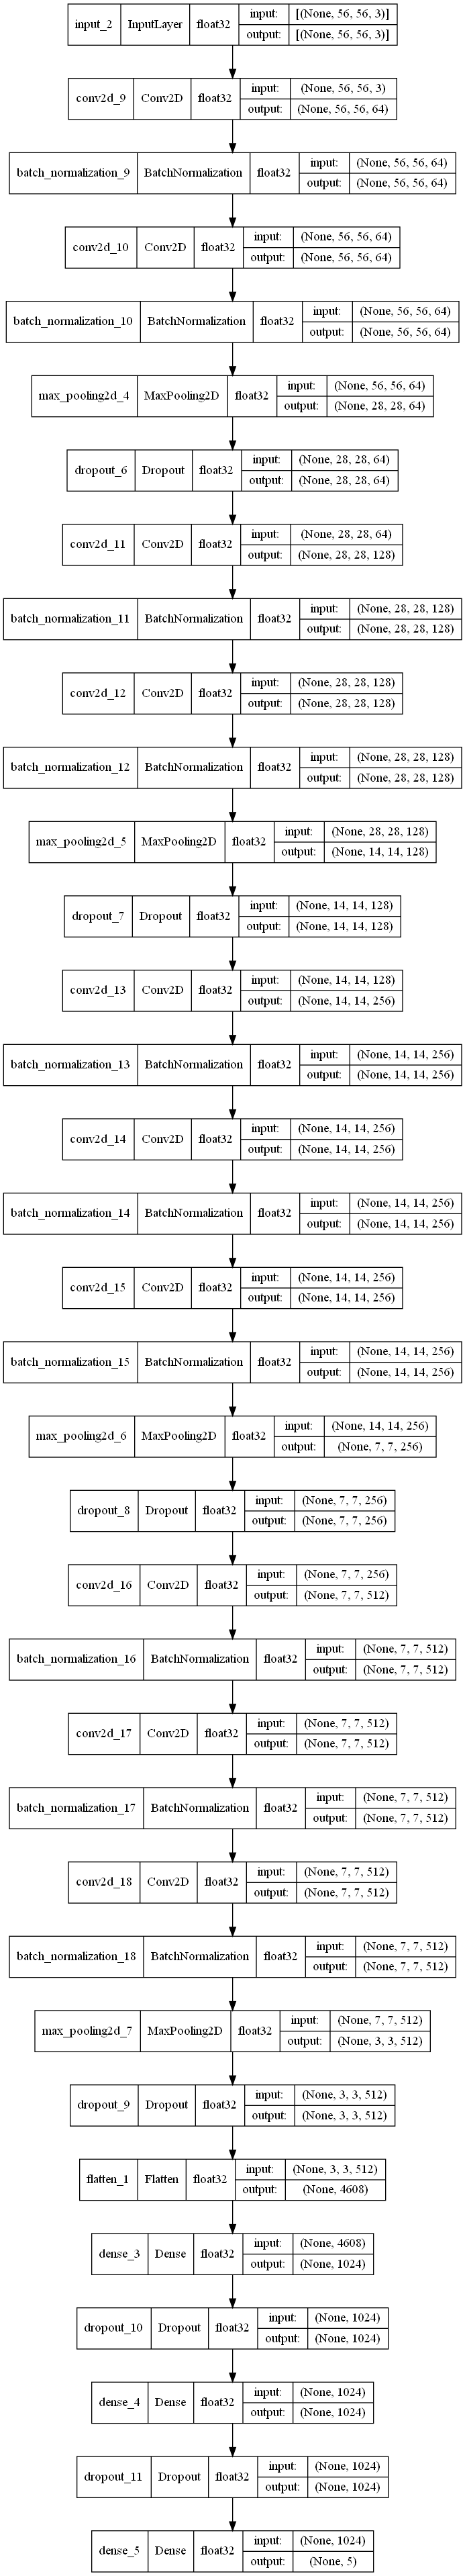

In [15]:
plot_model(model=cassava_model,
           to_file='model architecture/cassava_exp_5.png',
           show_layer_names=True,
           show_dtype=True,
           show_shapes=True)

In [6]:
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=30,
                           restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=20)

best_checkpoint = ModelCheckpoint(filepath='checkpoints/cassava_VGGNet_4.hdf5',
                                  monitor='val_loss',
                                  save_best_only=True)

In [7]:
cassava_model.compile(optimizer=Adam(),
                      loss=categorical_crossentropy,
                      metrics=['accuracy'])

In [8]:
cassava_history = cassava_model.fit(train_data,
                                    batch_size=32,
                                    epochs=500,
                                    callbacks=[early_stop, best_checkpoint, reduce_lr],
                                    validation_data=val_data)

Epoch 1/500
77/77 [==============================] - 24s 240ms/step - loss: 4.2972 - accuracy: 0.2448 - val_loss: 1.6872 - val_accuracy: 0.2381 - lr: 0.0010
Epoch 2/500
77/77 [==============================] - 16s 202ms/step - loss: 2.0467 - accuracy: 0.2628 - val_loss: 1.6337 - val_accuracy: 0.2476 - lr: 0.0010
Epoch 3/500
77/77 [==============================] - 16s 210ms/step - loss: 1.7645 - accuracy: 0.2842 - val_loss: 1.6065 - val_accuracy: 0.2508 - lr: 0.0010
Epoch 4/500
77/77 [==============================] - 16s 204ms/step - loss: 1.6555 - accuracy: 0.2912 - val_loss: 1.5896 - val_accuracy: 0.2857 - lr: 0.0010
Epoch 5/500
77/77 [==============================] - 16s 208ms/step - loss: 1.6314 - accuracy: 0.2789 - val_loss: 1.5624 - val_accuracy: 0.2730 - lr: 0.0010
Epoch 6/500
77/77 [==============================] - 16s 213ms/step - loss: 1.5736 - accuracy: 0.3129 - val_loss: 1.4940 - val_accuracy: 0.3111 - lr: 0.0010
Epoch 7/500
77/77 [==============================] - 15s 1

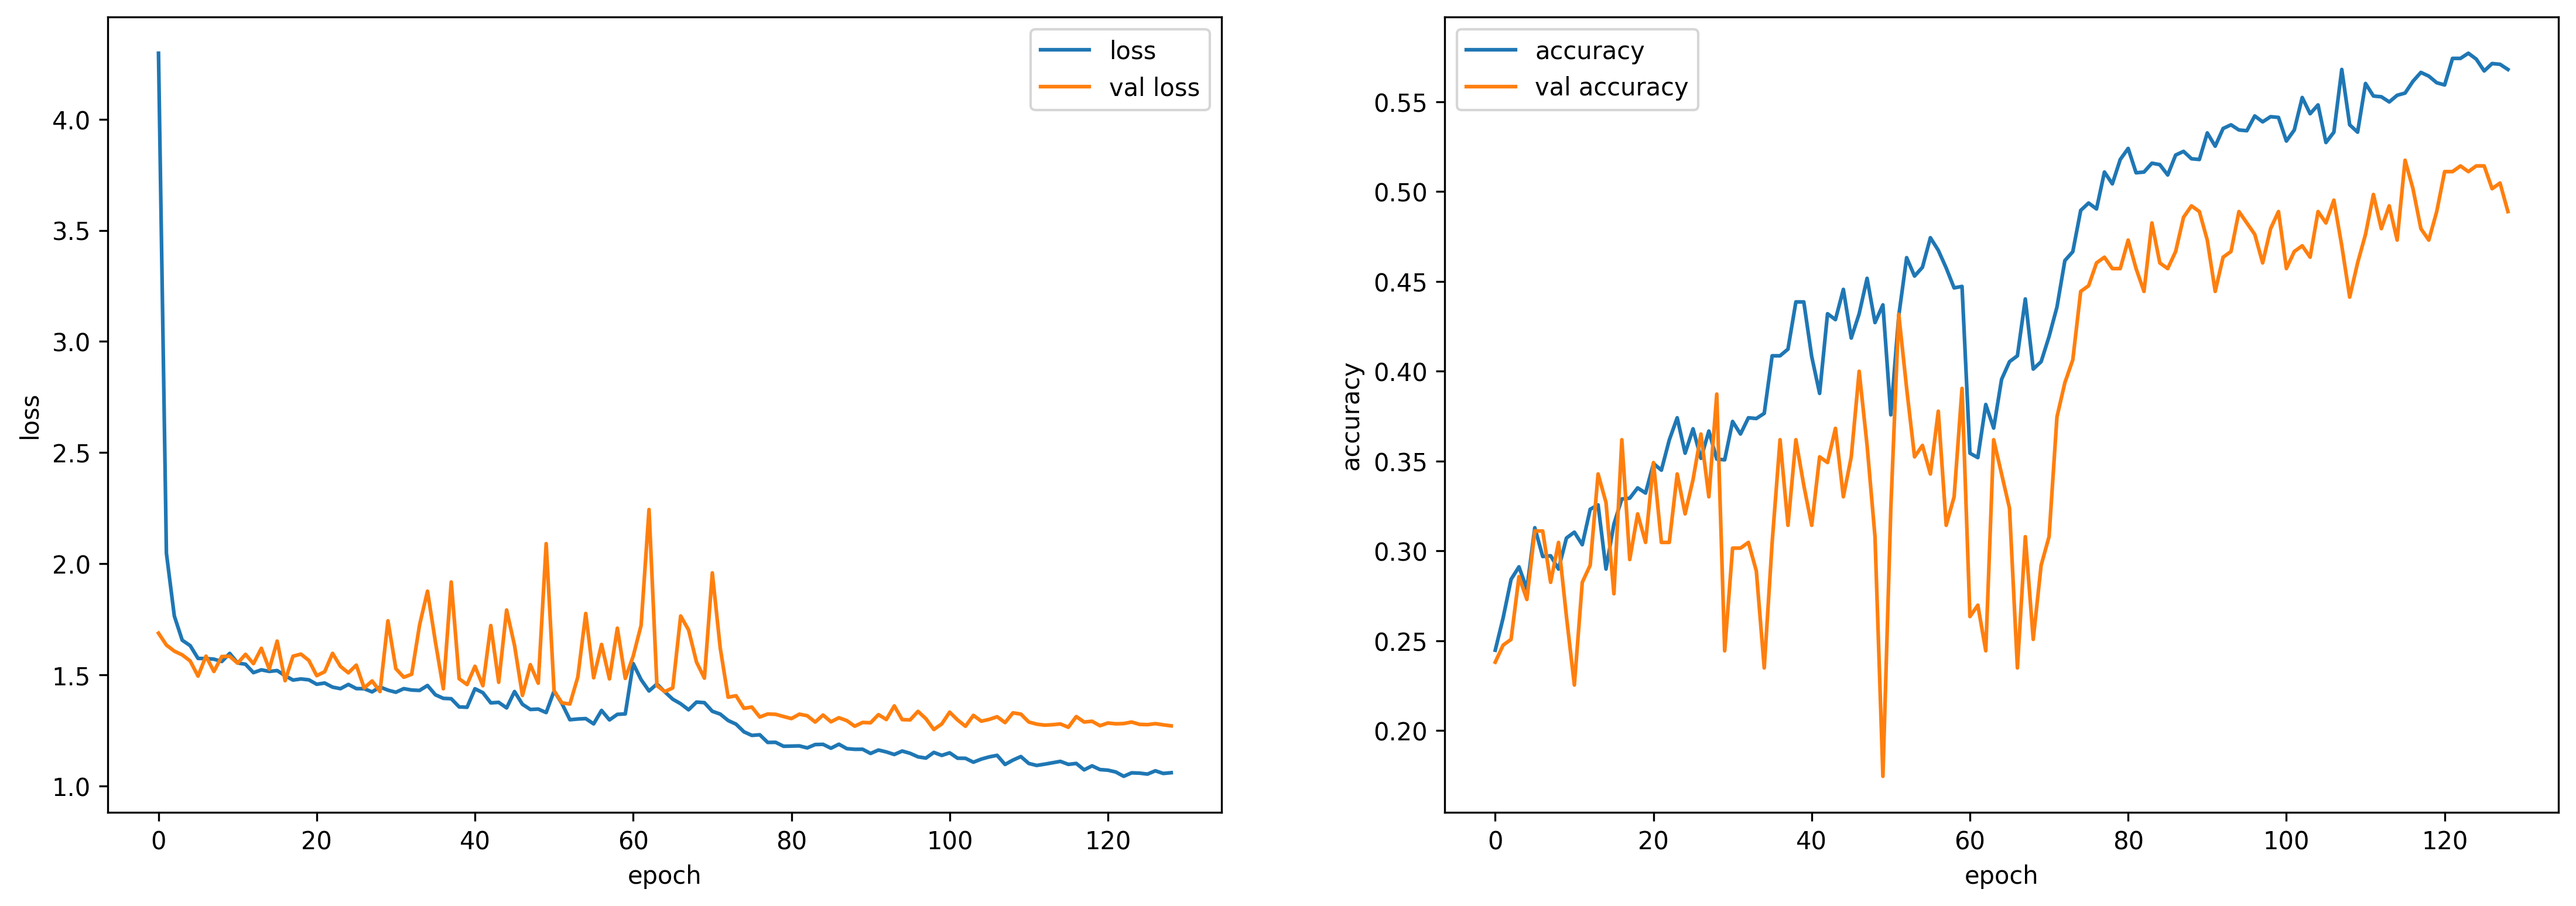

In [13]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[18, 6], dpi=300)
axes = axes.ravel()
epochs = list(range(len(cassava_history.history['loss'])))

sns.lineplot(x=epochs, y=cassava_history.history['loss'], ax=axes[0], label='loss')
sns.lineplot(x=epochs, y=cassava_history.history['val_loss'], ax=axes[0], label='val loss')
# sns.lineplot(x=epochs, y=cassava_history.history['precision'], ax=axes[1], label='precision')
# sns.lineplot(x=epochs, y=cassava_history.history['val_precision'], ax=axes[1], label='val precision')
# sns.lineplot(x=epochs, y=cassava_history.history['recall'], color='#025918', ax=axes[1], label='recall')
# sns.lineplot(x=epochs, y=cassava_history.history['val_recall'], color='#D9B504', ax=axes[1], label='val recall')
sns.lineplot(x=epochs, y=cassava_history.history['accuracy'], ax=axes[1], label='accuracy')
sns.lineplot(x=epochs, y=cassava_history.history['val_accuracy'], ax=axes[1], label='val accuracy')
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')
# axes[1].set_xlabel('epoch')
# axes[1].set_ylabel('precision and recall')
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.savefig('VGGNet_base_conv_train_history_cassava_4.png')
plt.show()